# Training a PPO policy with rllib.

We demonstrate how to train a PPO policy using the rllib package.

First install and import the required packages:

In [1]:
%pip install --quiet --upgrade pip
%pip install --quiet -U "ray[rllib]==2.37.0"
%pip install --quiet git+https://github.com/pyrddlgym-project/rddlrepository.git
%pip install --quiet git+https://github.com/pyrddlgym-project/pyRDDLGym-rl.git

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Import the required packages:

In [2]:
import warnings
warnings.filterwarnings("ignore")
import os
from IPython.display import Image

from ray.tune.registry import register_env
from ray.rllib.algorithms.ppo import PPOConfig

import pyRDDLGym
from pyRDDLGym.core.visualizer.movie import MovieGenerator

from pyRDDLGym_rl.core.agent import RLLibAgent
from pyRDDLGym_rl.core.env import SimplifiedActionRDDLEnv

We will optimize the classical CartPole control problem. In this case, the environment creation has to be wrapped in an outside function as follows, and the observation space needs to be flattened:

In [3]:
def env_creator(env_config):
    return pyRDDLGym.make(env_config['domain'], env_config['instance'], base_class=SimplifiedActionRDDLEnv) 

register_env('RLLibEnv', env_creator)

Let's set up and train a PPO agent:

In [4]:
# set up the agent
config = PPOConfig()
config = config.env_runners(num_env_runners=1, num_envs_per_env_runner=8)
config = config.environment('RLLibEnv', env_config={'domain': 'Reservoir_ippc2023', 'instance': '1'})
config = config.training(train_batch_size_per_learner=64, lr=0.0003, gamma=0.98, lambda_=0.5)
algo = config.build()

# train the agent
for n in range(100):
    result = algo.train()
    if n % 10 == 0: print(f'iteration {n}, mean return {result["env_runners"]["episode_reward_mean"]}')

C:\Python\envs\rddlnb\Lib\site-packages\ray\rllib\algorithms\algorithm.py:555: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
`UnifiedLogger` will be removed in Ray 2.7.
  return UnifiedLogger(config, logdir, loggers=None)
C:\Python\envs\rddlnb\Lib\site-packages\ray\tune\logger\unified.py:53: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
The `JsonLogger interface is deprecated in favor of the `ray.tune.json.JsonLoggerCallback` interface and will be removed in Ray 2.7.
  self._loggers.append(cls(self.config, self.logdir, self.trial))
C:\Python\envs\rddlnb\Lib\site-packages\ray\tune\logger\unified.py:53: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppre

iteration 0, mean return -42201.1226705054
iteration 10, mean return -34347.93848920746
iteration 20, mean return -27079.48502499436
iteration 30, mean return -11586.812786216222
iteration 40, mean return -5314.710062150564
iteration 50, mean return -1197.3102556924396
iteration 60, mean return -390.2064510148477
iteration 70, mean return -425.92802183586775
iteration 80, mean return -43.05392208331204
iteration 90, mean return -232.74436257098216


To evaluate the trained agent, we wrap it in a ``RLLibAgent`` wrapper, which is an instance of pyRDDLGym's ``BaseAgent``:

In [5]:
agent = RLLibAgent(algo)

Lastly, we evaluate the agent as always:

{'mean': -275.78113195599644, 'median': -275.78113195599644, 'min': -275.78113195599644, 'max': -275.78113195599644, 'std': 0.0}


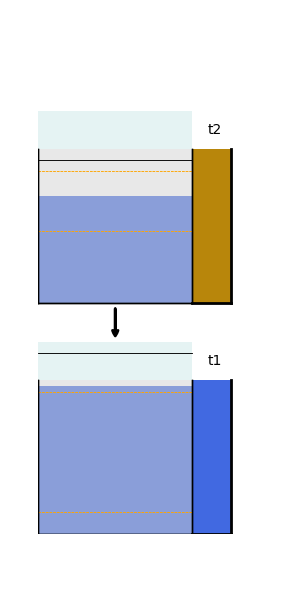

In [6]:
# for recording movies
if not os.path.exists('frames'):
    os.makedirs('frames')
env = env_creator({'domain': 'Reservoir_ippc2023', 'instance': '1'})
recorder = MovieGenerator("frames", "reservoir_rllib", max_frames=env.horizon)
env.set_visualizer(viz=None, movie_gen=recorder)

print(agent.evaluate(env, episodes=1, verbose=False, render=True))
env.close()
Image(filename='frames/reservoir_rllib_0.gif') 